In [1]:
%cd ~/google_drive/code/projects/texture_classifier/python

import cv2
from core.utils import *
from sklearn.preprocessing import StandardScaler

from IPython.display import display

/Users/alexbraun/google_drive/code/projects/texture_classifier/python


In [2]:
def get_patches(info):
    # create data from info
    data = info.copy()
    data = data[['source', 'common_name', 'params']]
    data.source = data.source.apply(lambda x: PIL.Image.open(x))
    data = data.apply(lambda x: 
        generate_samples(x['source'], x['common_name'], x['params']),
        axis=1
    )
    # create new expanded dataframe
    data = list(chain(*data.tolist()))
    data = DataFrame(data, columns=['x', 'y', 'params'])
    return data

In [3]:
wood_mask = [
    'moabi',
    'sapele',
#     'olive-ash',
    'european-ash',
    'kingwood',
    'european-lime',
    'african-mahogany',
    'olive',
    # -----------------
#     'macassar-ebony',
    'peruvian-walnut'
#     'bog-oak',
#     'goncalo-alves',
#     'merbau'
]

source = '/Users/alexbraun/Documents/data/texture_classifier/data/texture'
spec = [
    'material',
    'image_id',
    'common_name',
    'origin',
    'desc',
    'source_extension'
]
info = get_info(source, spec)
mask = info.common_name.apply(lambda x: x in wood_mask)
info = info[mask]
info = info[info.origin == 'arroway-textures']

# r = Series(np.linspace(0, 1.0, info.shape[0]/3.0))
# g = r.apply(lambda x: [0, x, 0])
# b = r.apply(lambda x: [0, 0, x])
# r = r.apply(lambda x: [x, 0, 0])
# r = r.apply(lambda x: matplotlib.colors.rgb2hex(x))
# g = g.apply(lambda x: matplotlib.colors.rgb2hex(x))
# b = b.apply(lambda x: matplotlib.colors.rgb2hex(x))
# x = r.append(g).append(b)
# x = x.append(x.tail(1))
# x = x.tolist()

# info.sort('common_name', inplace=True)
# info['color'] = x
lut = {
    'african-mahogany': 'red',
    'european-ash':     'green',
    'european-lime':    'blue',
    'kingwood':         'cyan',
    'moabi':            'white',
    'olive':            'grey',
    'peruvian-walnut':  'purple',
    'sapele':           'yellow'
}
info['color'] = info.common_name.apply(lambda x: lut[x])

In [19]:
ss = StandardScaler()
hist = []
# fig, ax = plt.subplots(figsize=(18,10))
# plt.xlim((-5, 5))
# plt.ylim(0, 12000)
plots = []
for i, row in info.iterrows():
    img = row['source']
    img = cv2.imread(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = cv2.GaussianBlur(img,(3,3),0)

#     img = ss.fit_transform(img)
#     img = cv2.Laplacian(img,cv2.CV_64F)
#     img = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
#     img = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

    img = np.fft.hfft(img).astype(float)
    img = ss.fit_transform(img)
    y, x = np.histogram(img.ravel(), bins=256)
    plots.append([ x[:-1], y, row['color'] ])
#     ax.imshow(img, cmap='bone')
#     ax.plot(x[:-1], y, color=row['color'])
    
#     # convolute with proper kernels


#     plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
#     plt.title('Original'), plt.xticks([]), plt.yticks([])
#     plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray') 
#     plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
#     plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
#     plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
#     plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
#     plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

#     plt.show()

In [ ]:
# spec = {
#     0: 'material',
#     1: 'image_id',
#     2: 'common_name',
#     3: 'origin',
#     4: {'desc': {
#         'image_class': ['a', 'b', 'c'],
#         'pass':        ['diffuse', 'bump', 'reflectivity'],
#         'sanded':      ['sanded'],
#         'sealed':      ['sealed'],
#         'saw_type':    ['halfsawn', 'quartersawn']
#         }
#     }
#     5: 'source_extension'
# }

In [15]:
info.drop_duplicates('color')

,texture,image_id,common_name,origin,desc,source_extension,source,color
10,wood,00009,african-mahogany,arroway-textures,#d_a_diffuse,png,/Users/alexbraun/Documents/data/texture_classi...,red
471,wood,00470,european-ash,arroway-textures,#d_a_diffuse,png,/Users/alexbraun/Documents/data/texture_classi...,green
505,wood,00504,european-lime,arroway-textures,#d_a_diffuse,png,/Users/alexbraun/Documents/data/texture_classi...,blue
661,wood,00660,kingwood,arroway-textures,#d_a_diffuse,png,/Users/alexbraun/Documents/data/texture_classi...,cyan
797,wood,00796,moabi,arroway-textures,#d_a_diffuse,png,/Users/alexbraun/Documents/data/texture_classi...,white
881,wood,00880,olive,arroway-textures,#d_a_diffuse,png,/Users/alexbraun/Documents/data/texture_classi...,grey
946,wood,00945,peruvian-walnut,arroway-textures,#d_a_diffuse,png,/Users/alexbraun/Documents/data/texture_classi...,purple
1064,wood,01063,sapele,arroway-textures,#d_a_diffuse,png,/Users/alexbraun/Documents/data/texture_classi...,yellow


In [20]:
from pandas.io.pytables import HDFStore
hdf = HDFStore('/Users/alexbraun/Desktop/grain-fft-7-arroway.hdf')
hdf['plots'] = Series(plots)
hdf.close()

In [3]:
plots = pd.read_hdf('/Users/alexbraun/Desktop/grain-fft-7-arroway.hdf')

In [ ]:
# fullwidth half max
# var
# probabilistic graph model

In [4]:
%matplotlib qt
fig, ax = plt.subplots()
for x, y, c in plots:
    ax.plot(x, y, color=c)

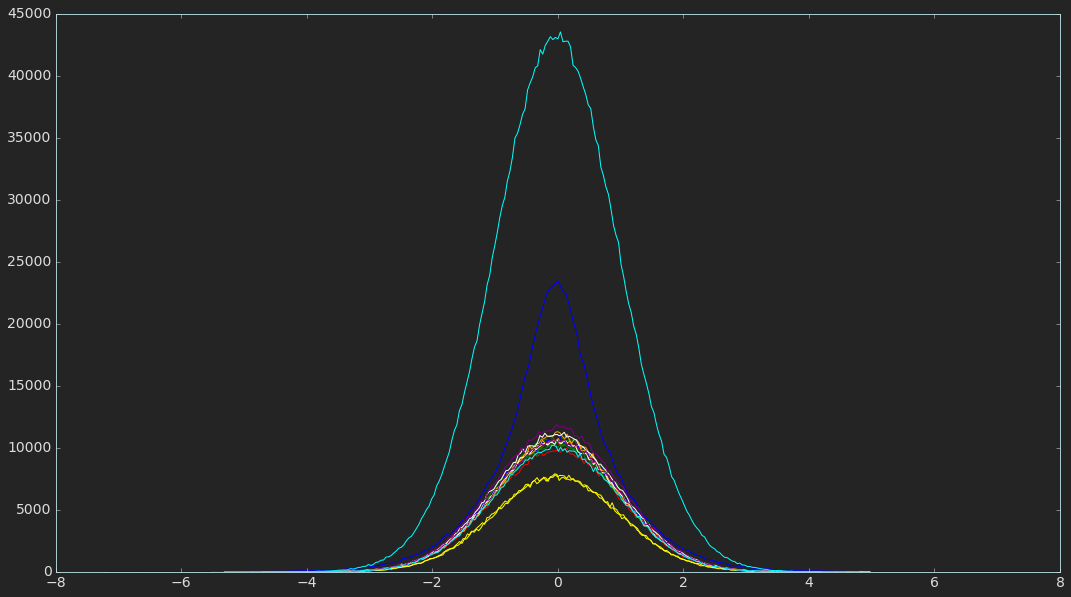

In [116]:
ss = StandardScaler()
hist = []
fig, ax = plt.subplots(figsize=(18,10))
# plt.xlim((-3000, 3000))
# plt.ylim(0, 12000)
for i, row in info.iterrows():
    img = row['source']
    img = cv2.imread(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.fft.hfft(img).astype(float)
    img = ss.fit_transform(img)
    y, x = np.histogram(img.ravel(), bins=256)
    ax.plot(x[:-1], y, color=row['color'])

In [8]:
c = []
lut = {0:'red', 1:'blue', 2:'green'}
prev = info.head(1).common_name.values[0]
i = 0
for name in info.common_name:
    if name == prev:
        c.append(lut[i])
    else:
        i += 1
        if i == 3:
            i = 0
        c.append(lut[i])
info.color = c